In [15]:
import numpy as np
from implementations import *
from general_helpers import *
from proj1_helpers import *
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [16]:
'''Load the data both from train and test csv file'''

y, x, ids = load_csv_data("train.csv", sub_sample=False)
#_, x_submission, ids_submission = load_csv_data("test.csv", sub_sample=False)

In [5]:
'''Test different ways of "cleaning" data'''
x_0 = x
x_0[x==-999] = 0
x_norm = non_values_to_random_normally_dist(x)
compare(x_norm, x_0)#Should give zero

Number of indices which are different is 0


0

In [17]:
#Set values to zero and standardize
#x[x==-999] = 0
x = non_values_to_random_normally_dist(x)
x = standardize_by_column(x)

In [22]:
'''Peforming Gradient Descent'''

degree = 1
ratio = 0.70  #train/test examples
 
seed = 1
dim_w = get_length_w(x,degree)
initial_w, max_iters, gamma = np.zeros(dim_w), 20 , 0.000001#requires fine balance btw. iter/gamma - otherwise blows up


w = GD_with_simple_splitting(y,x, degree, ratio, initial_w, max_iters, gamma, seed)#"simple splitting=>no cross validation

Correct answers:  71.6333333333 % Execution time=6.340569972991943 seconds


In [23]:
'''Performing SGD'''#Execution time is longer!!!

degree = 1
ratio = 0.70  #train/test examples
 
seed = 1
dim_w = get_length_w(x,degree)
initial_w, max_iters, gamma = np.zeros(dim_w), 20 , 0.000001#requires fine balance btw. iter/gamma - otherwise blows up


w = SGD_with_simple_splitting(y,x, degree, ratio, initial_w, max_iters, gamma, seed)

Correct answers:  64.8733333333 % Execution time=20.580325841903687 seconds


In [21]:
'''Least Squares'''

degree = 11
ratio = 0.70  #train/test examples
 
seed = 1

w = LS_with_simple_splitting(y,x, degree, ratio, seed)

Execution time=2.850709915161133 seconds
Correct answers:  75.6666666667


In [ ]:
'''Ridge Regression'''
degree = 11
ratio = 0.70  #train/test examples
#lambdas = np.logspace(-8,0.1,20) 
lambdas = np.logspace(-7,0.1,10)

seed = 137

w = ridge_with_simple_splitting(y,x, degree, ratio, lambdas, seed)

Correct answers:  82.6176 % for lambda = 0.000000
Correct answers:  82.608 % for lambda = 0.000000
Correct answers:  82.6112 % for lambda = 0.000001
Correct answers:  82.6176 % for lambda = 0.000005
Correct answers:  82.5472 % for lambda = 0.000017
Correct answers:  82.5408 % for lambda = 0.000060
Correct answers:  82.5648 % for lambda = 0.000215
Correct answers:  82.5168 % for lambda = 0.000774
Correct answers:  82.4816 % for lambda = 0.002783
Correct answers:  82.3792 % for lambda = 0.010000
Correct answers:  82.768 % for lambda = 0.000000
Correct answers:  82.76 % for lambda = 0.000000
Correct answers:  82.76 % for lambda = 0.000001
Correct answers:  82.7504 % for lambda = 0.000005
Correct answers:  82.7248 % for lambda = 0.000017
Correct answers:  82.7648 % for lambda = 0.000060
Correct answers:  82.7456 % for lambda = 0.000215
Correct answers:  82.7472 % for lambda = 0.000774
Correct answers:  82.7056 % for lambda = 0.002783
Correct answers:  82.616 % for lambda = 0.010000
Correct

array([  3.60129479e-01,  -2.85327470e-01,  -2.49387639e-01,
         1.46623378e-01,   4.20776915e-03,  -1.49412578e-02,
         3.68348460e-03,  -4.22768195e-04,   2.59240782e-05,
        -8.20344166e-07,   1.05290599e-08,  -2.30362980e-01,
        -8.16319941e-04,   2.45163334e-02,   8.55076400e-03,
         4.72312536e-03,  -5.02091583e-03,   1.36020945e-03,
        -1.76268792e-04,   1.21538364e-05,  -4.29854190e-07,
         6.13797849e-09,   4.04458414e-02,  -1.75171226e-01,
        -6.75338439e-02,   9.12956801e-02,  -2.96272991e-02,
         4.74113139e-03,  -4.34293805e-04,   2.38238631e-05,
        -7.73223630e-07,   1.36800724e-08,  -1.01590274e-10,
         7.73163398e-02,   1.26394838e-01,   5.21685764e-02,
        -1.12297645e-01,   4.27959979e-02,  -5.81525437e-03,
         1.02262258e-04,   3.49566250e-05,  -1.73946343e-06,
        -2.74982831e-08,   9.67468452e-10,   4.12233334e-02,
         1.05121186e-02,   1.60625040e-03,  -1.14425118e-02,
        -5.69375549e-03,

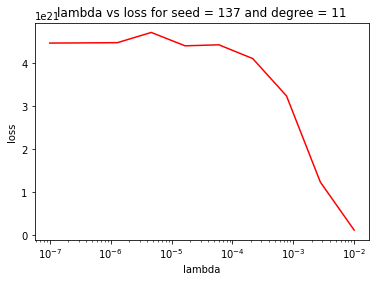

In [20]:
'''Ridge Regression With Cross Validation'''
degree = 11
lambdas = np.logspace(-7,-2,10)
k_fold = 4
seed = 137

cross_validation_ridge(y, x, k_fold, degree, lambdas, seed)

In [14]:
'''Logistic Regression'''#Taking forever
degree = 1
ratio = 0.70 
dim_w = get_length_w(x,degree)
initial_w, max_iters, gamma = np.zeros(dim_w), 500 , 1.
logistic_with_simple_splitting(y,x, degree, ratio, initial_w, max_iters, gamma, seed = 1)

/Users/arvingopal5794/project_1_final/implementations_helpers.py:40: RuntimeWarning: overflow encountered in exp
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/arvingopal5794/project_1_final/implementations_helpers.py:36: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t) ) #np.exp(t)/(1+np.exp(t))
/Users/arvingopal5794/project_1_final/implementations.py:107: RuntimeWarning: invalid value encountered in double_scalars
  if iter_ > 1 and np.abs(loss - previousloss) < threshold:


Correct answers:  67.9573333333 %


array([  1.27452978e+07,  -2.71968894e+07,  -9.43612297e+05,
         1.49327572e+07,   1.16750368e+07,   1.22871198e+07,
        -7.72342986e+06,   1.08859216e+06,  -4.70354676e+05,
         1.18267856e+07,  -1.52288189e+07,   2.03906840e+07,
         1.31787747e+07,   1.90417283e+07,   5.27053179e+04,
        -1.64522160e+05,  -1.96308102e+06,   2.95704327e+05,
         1.74540724e+05,   1.64544046e+06,   4.63889321e+05,
         1.07001777e+07,   8.38314517e+06,   1.26037226e+07,
        -1.05853460e+04,  -1.29050009e+05,   7.61553803e+06,
         3.37521667e+03,  -2.82938570e+05,   1.00492320e+07,
        -3.11363636e+07,   2.66909305e+06,  -4.92416906e+07,
        -1.29022039e+07,  -5.63912747e+06,   8.27035635e+06,
        -1.98722652e+06,  -2.68627271e+06,   5.72264902e+06,
         4.66597927e+05,  -7.19231676e+04,  -2.07557556e+06,
         4.61067069e+06,   1.17371591e+05,   3.38404151e+06,
         4.35454140e+06,  -3.99608810e+04,  -2.14088947e+06,
        -9.04143595e+05,

/Users/arvingopal5794/project_1_final/implementations_helpers.py:40: RuntimeWarning: overflow encountered in exp
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/arvingopal5794/project_1_final/implementations_helpers.py:36: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t) ) #np.exp(t)/(1+np.exp(t))
/Users/arvingopal5794/project_1_final/implementations.py:138: RuntimeWarning: invalid value encountered in double_scalars
  if iter_ > 1 and np.abs(loss - previousloss) < threshold:


Correct answers:  69.04 % for lambda = 0.000000
Correct answers:  69.04 % for lambda = 0.000001
Correct answers:  69.0386666667 % for lambda = 0.000112
Correct answers:  69.0386666667 % for lambda = 0.011885
Correct answers:  72.6173333333 % for lambda = 1.258925


array([  1.06237836e+03,  -5.25975617e+04,  -3.47155648e+03,
         3.27946144e+04,   3.29205023e+04,   3.03239909e+04,
        -2.85419252e+04,  -1.91289317e+03,  -2.12556046e+03,
         2.62290820e+04,  -2.84686648e+04,   4.42496301e+04,
         2.18931841e+04,   3.50212485e+04,  -1.23958816e+02,
        -4.55491205e+02,  -4.61436435e+03,   3.94645776e+02,
         6.57306802e+02,   6.48687644e+03,   1.18588286e+03,
         2.32729942e+04,   2.48045660e+04,   1.46639903e+04,
         6.34561848e+01,  -2.20562040e+02,  -3.67829915e+03,
        -7.92572257e+01,  -8.20448444e+02,   2.39939425e+04,
        -3.33190971e+04,  -2.22173105e+04,  -9.11175298e+04,
        -1.89031362e+04,  -5.76025435e+01,   7.36807081e+03,
        -6.32281208e+03,   2.08507087e+03,  -1.01859915e+04,
         6.96487803e+00,   2.45372523e+04,   1.77314902e+03,
        -9.05943089e+03,  -1.26637803e+03,   3.17256023e+04,
         7.36561443e+04,  -1.31668763e+03,   9.22863964e+03,
         5.68255530e+02,

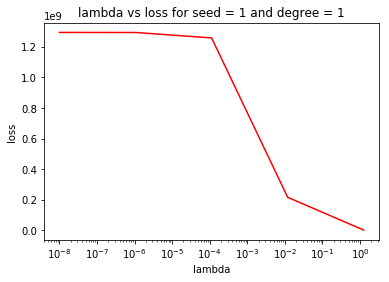

In [19]:
'''Regularized Logistic Regression'''#Takes a few minutes!
degree = 1
ratio = 0.7
dim_w = get_length_w(x,degree)
initial_w, max_iters, gamma = np.zeros(dim_w), 500 , 1.
lambdas = np.logspace(-8,0.1,5)
reg_logistic_with_simple_splitting(y,x, 1, ratio, initial_w, max_iters, gamma, lambdas, seed = 1)

/Users/arvingopal5794/project_1_final/implementations_helpers.py:40: RuntimeWarning: overflow encountered in exp
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/arvingopal5794/project_1_final/implementations_helpers.py:36: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t) ) #np.exp(t)/(1+np.exp(t))
/Users/arvingopal5794/project_1_final/implementations.py:138: RuntimeWarning: invalid value encountered in double_scalars
  if iter_ > 1 and np.abs(loss - previousloss) < threshold:


Correct answers:  55.2016 % for lambda = 0.000010
Correct answers:  55.2592 % for lambda = 0.000316
Correct answers:  53.7472 % for lambda = 0.010000
Correct answers:  55.8832 % for lambda = 0.316228


/Users/arvingopal5794/project_1_final/implementations_helpers.py:40: RuntimeWarning: invalid value encountered in subtract
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/arvingopal5794/project_1_final/implementations_helpers.py:40: RuntimeWarning: invalid value encountered in double_scalars
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))


Correct answers:  0.0 % for lambda = 10.000000
Correct answers:  57.3776 % for lambda = 0.000010
Correct answers:  57.3424 % for lambda = 0.000316
Correct answers:  57.576 % for lambda = 0.010000
Correct answers:  57.112 % for lambda = 0.316228
Correct answers:  0.0 % for lambda = 10.000000
Correct answers:  43.952 % for lambda = 0.000010
Correct answers:  43.8448 % for lambda = 0.000316
Correct answers:  43.9472 % for lambda = 0.010000
Correct answers:  44.776 % for lambda = 0.316228
Correct answers:  0.0 % for lambda = 10.000000
Correct answers:  54.928 % for lambda = 0.000010
Correct answers:  54.9168 % for lambda = 0.000316
Correct answers:  53.4512 % for lambda = 0.010000
Correct answers:  55.2848 % for lambda = 0.316228
Correct answers:  0.0 % for lambda = 10.000000


array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

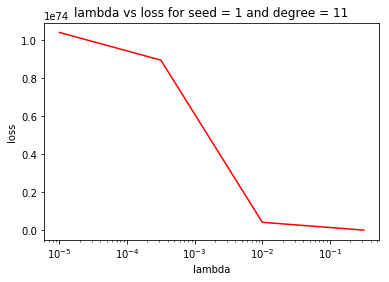

In [13]:
'''(Reg.) Logistic Regression With Cross Validation'''#This function takes around 1 hour!

k_fold = 4 #define the number of folds
degree = 11 #define the degree
dim_w = get_length_w(x,degree)
initial_w, max_iters, gamma = np.zeros(dim_w), 500 , 1.
lambdas = np.logspace(-5,1,5) #define the lambdas
seed = 1 #seed for the random splitting

cross_validation_logistic(y, x, initial_w, max_iters, gamma, k_fold, degree, lambdas, seed)

In [ ]:
'''Define values to perform Ridge regression with simple splitting of the dataset'''

degree = 12
ratio = 0.70  #train/test examples
lambdas = np.arange(0.000428, 0.00044, 0.000001) 
seed = 1

q = 2.1

w = bayes_with_simple_splitting(y,x, degree, ratio, lambdas, q , seed)

In [ ]:
'''Define values to perform Ridge regression with simple splitting of the dataset'''

degree = 12
ratio = 0.70  #train/test examples
lambdas = [0.000432] 
seed = 1

q = 2.1

w = bayes_with_simple_splitting(y,x, degree, ratio, lambdas, q , seed)

In [ ]:
create_submission(x_submission, degree, ids_submission)